In [2]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    #fit() 메서드는 아무것도 학습하지 않음.
    def fit(self, x, y=None):
        pass
    #predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측
    def predict(self, x):
        pred = np.zeros((x.shape[0],1))
        for i in range(x.shape[0]):
            if x['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
        return pred

In [7]:
from sklearn import preprocessing
import numpy as np

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0, inplace = True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis = 1)
x_titanic_df = transform_features(x_titanic_df)
x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size = 0.2, random_state = 0)

myclf = MyDummyClassifier()
myclf.fit(x_train, y_train)

pred = myclf.predict(x_test)
print('Dummy Classifier의 정확도는 : {0:4f}'.format(accuracy_score(y_test,pred)))

Dummy Classifier의 정확도는 : 0.787709


In [9]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,x,y):
        pass
    def predict(self, x):
        return np.zeros((len(x),1), dtype=bool)
    
digits = load_digits()

y = (digits.target == 7).astype(int)
x_train,x_test,y_train,y_test = train_test_split(digits.data, y, random_state = 11)

In [10]:
print('레이블 테스트 세트 크기 : ', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

fakeclf = MyFakeClassifier()
fakeclf.fit(x_train,y_train)
fakepred = fakeclf.predict(x_test)
print('모든 예측을 0으로 하여도 정확도는 : {:3f}'.format(accuracy_score(y_test,fakepred)))

레이블 테스트 세트 크기 :  (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는 : 0.900000


In [11]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,fakepred)

array([[405,   0],
       [ 45,   0]])

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    print('정확도 : {0:4f}, 정밀도 : {1:4f}, 재현율 : {2:4f}'.format(accuracy, precision, recall))

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 분할
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis = 1)
x_titanic_df = transform_features(x_titanic_df)
x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size = 0.2, random_state = 11)

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(x_train,y_train)
lrpred = lr_clf.predict(x_test)
get_clf_eval(y_test, lrpred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도 : 0.849162, 정밀도 : 0.774194, 재현율 : 0.786885


In [24]:
pred_proba = lr_clf.predict_proba(x_test)
pred = lr_clf.predict(x_test)
print('pred_proba의 결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 5개 샘플 추출 : \n', pred_proba[:5])

# 예측 확률 array와 예측 결과 값 array를 병합(concatenate)해 예측 확률과 결과값 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis = 1)
print('두 개의 class 중 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:5])

pred_proba의 결과 Shape : (179, 2)
pred_proba array에서 앞 5개 샘플 추출 : 
 [[0.46200328 0.53799672]
 [0.87869992 0.12130008]
 [0.8771714  0.1228286 ]
 [0.88258544 0.11741456]
 [0.85519894 0.14480106]]
두 개의 class 중 더 큰 확률을 클래스 값으로 예측 
 [[0.46200328 0.53799672 1.        ]
 [0.87869992 0.12130008 0.        ]
 [0.8771714  0.1228286  0.        ]
 [0.88258544 0.11741456 0.        ]
 [0.85519894 0.14480106 0.        ]]


In [25]:
from sklearn.preprocessing import Binarizer

x = [[1,-1,2],
    [2,0,0],
    [0, 1.1, 1.2]]

# x의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(x))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [27]:
custom_threshold = 0.4

pred_proba_1 = pred_proba[:, 1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[98 20]
 [10 51]]
정확도 : 0.832402, 정밀도 : 0.718310, 재현율 : 0.836066


In [28]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
        custom_predict = binarizer.transform(pred_proba_1)
        print('임계값 : ', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값 :  0.4
오차 행렬
[[98 20]
 [10 51]]
정확도 : 0.832402, 정밀도 : 0.718310, 재현율 : 0.836066
임계값 :  0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도 : 0.849162, 정밀도 : 0.765625, 재현율 : 0.803279
임계값 :  0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도 : 0.849162, 정밀도 : 0.774194, 재현율 : 0.786885
임계값 :  0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도 : 0.865922, 정밀도 : 0.836364, 재현율 : 0.754098
임계값 :  0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도 : 0.877095, 정밀도 : 0.882353, 재현율 : 0.737705


In [29]:
from sklearn.metrics import precision_recall_curve

#레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(x_test)[:,1]

#실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임계값 배열의 Shape: ', thresholds.shape)

# 반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출, 임계값을 15 Step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열 index 10개 : ', thr_index)
print('샘플용 10개의 임계값 : ', np.round(thresholds[thr_index],2))

print('샘플 임계값별 정밀도 : ', np.round(precisions[thr_index],3))
print('샘플 임계값별 재현율 : ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임계값 배열의 Shape:  (143,)
샘플 추출을 위한 임계값 배열 index 10개 :  [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임계값 :  [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값별 정밀도 :  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율 :  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


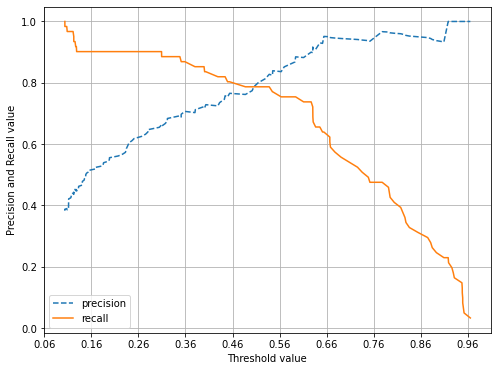

In [31]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1), 2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(x_test)[:,1])

In [32]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test,pred)
print('F1 스코어 : {0:4f}'.format(f1))

F1 스코어 : 0.780488


In [33]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    print('정확도 : {0:4f}, 정밀도 : {1:4f}, 재현율 : {2:4f}, F1 : {3:4f}'.format(accuracy, precision, recall,f1))
    
thresholds = [0.4,0.45,0.5,0.55,0.6]
pred_proba = lr_clf.predict_proba(x_test)
get_eval_by_threshold(y_test, pred_proba[:1].reshape(-1,1), thresholds)

임계값 :  0.4
오차 행렬
[[98 20]
 [10 51]]
정확도 : 0.832402, 정밀도 : 0.718310, 재현율 : 0.836066, F1 : 0.772727
임계값 :  0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도 : 0.849162, 정밀도 : 0.765625, 재현율 : 0.803279, F1 : 0.784000
임계값 :  0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도 : 0.849162, 정밀도 : 0.774194, 재현율 : 0.786885, F1 : 0.780488
임계값 :  0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도 : 0.865922, 정밀도 : 0.836364, 재현율 : 0.754098, F1 : 0.793103
임계값 :  0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도 : 0.877095, 정밀도 : 0.882353, 재현율 : 0.737705, F1 : 0.803571


In [34]:
from sklearn.metrics import roc_curve

pred_proba_class1 = lr_clf.predict_proba(x_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
thr_index = np.arange(1,thresholds.shape[0],5)
print('샘플 추출을 위한 임계값 배열의 index : ', thr_index)
print('샘플 index로 추출한 임계값: ', np.round(thresholds[thr_index],2))

print('샘플 임계값별 FPR : ', np.round(fprs[thr_index],3))
print('샘플 임계값별 TPR : ', np.round(tprs[thr_index],3))

샘플 추출을 위한 임계값 배열의 index :  [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임계값:  [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임계값별 FPR :  [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임계값별 TPR :  [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


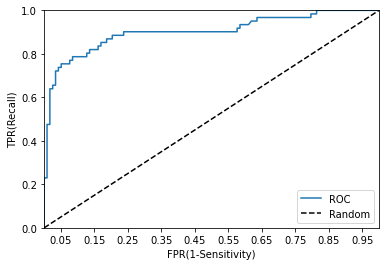

In [35]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1], 'k--', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:,1])

In [36]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(x_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값 : {0:4f}'.format(roc_score))

ROC AUC 값 : 0.902403
